In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


# Data Analysis

In [2]:
data_sales = pd.read_csv('train.csv')
data_sales.head(10)

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
5,2013-01-06,1,1,12
6,2013-01-07,1,1,10
7,2013-01-08,1,1,9
8,2013-01-09,1,1,12
9,2013-01-10,1,1,9


The data is sorted by date and hence no sorting is required. 

In [3]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [4]:
data_sales['date'] = pd.to_datetime(data_sales['date'])

In [5]:
data_sales.describe()

,date,store,item,sales
count,913000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 11:59:59.999999744,5.500000,25.500000,52.250287
min,2013-01-01 00:00:00,1.000000,1.000000,0.000000
25%,2014-04-02 00:00:00,3.000000,13.000000,30.000000
50%,2015-07-02 12:00:00,5.500000,25.500000,47.000000
75%,2016-10-01 00:00:00,8.000000,38.000000,70.000000
max,2017-12-31 00:00:00,10.000000,50.000000,231.000000
std,NaN,2.872283,14.430878,28.801144


## Sales per Store
Here we see there doesn't seem to be any numeric significance for store numbers (ascending/descending order of sales or something), hence it is safe to classify them as categorical variables.

In [6]:
total_sales_per_store = data_sales.groupby('store')['sales'].sum().reset_index()
total_sales_per_store.head(10)

,store,sales
0,1,4315603
1,2,6120128
2,3,5435144
3,4,5012639
4,5,3631016
5,6,3627670
6,7,3320009
7,8,5856169
8,9,5025976
9,10,5360158


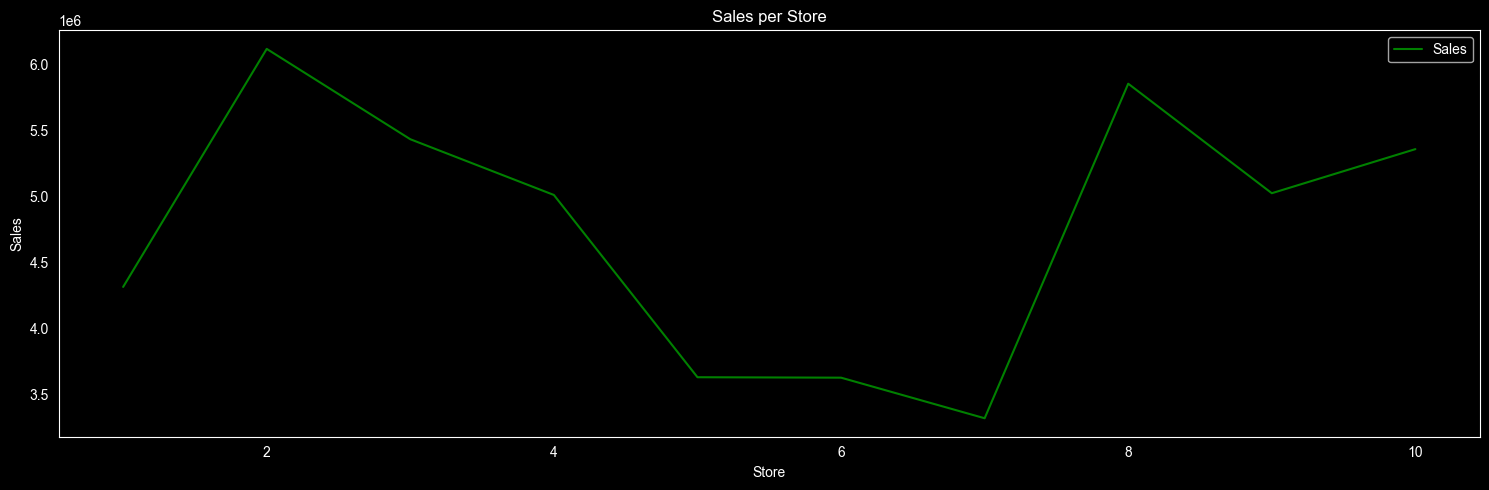

In [7]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(15,5))
plt.plot(total_sales_per_store['store'], total_sales_per_store['sales'], color='green', label='Sales')
plt.title('Sales per Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

## Sales per Item
Here we see there doesn't seem to be any numeric significance for item numbers (ascending/descending order of sales or something), hence it is safe to classify them as categorical variables.

In [8]:
total_sales_per_item = data_sales.groupby('item')['sales'].sum().reset_index()
total_sales_per_item.head(10)

,item,sales
0,1,401384
1,2,1069564
2,3,669087
3,4,401907
4,5,335230
5,6,1068281
6,7,1068777
7,8,1405108
8,9,938379
9,10,1337133


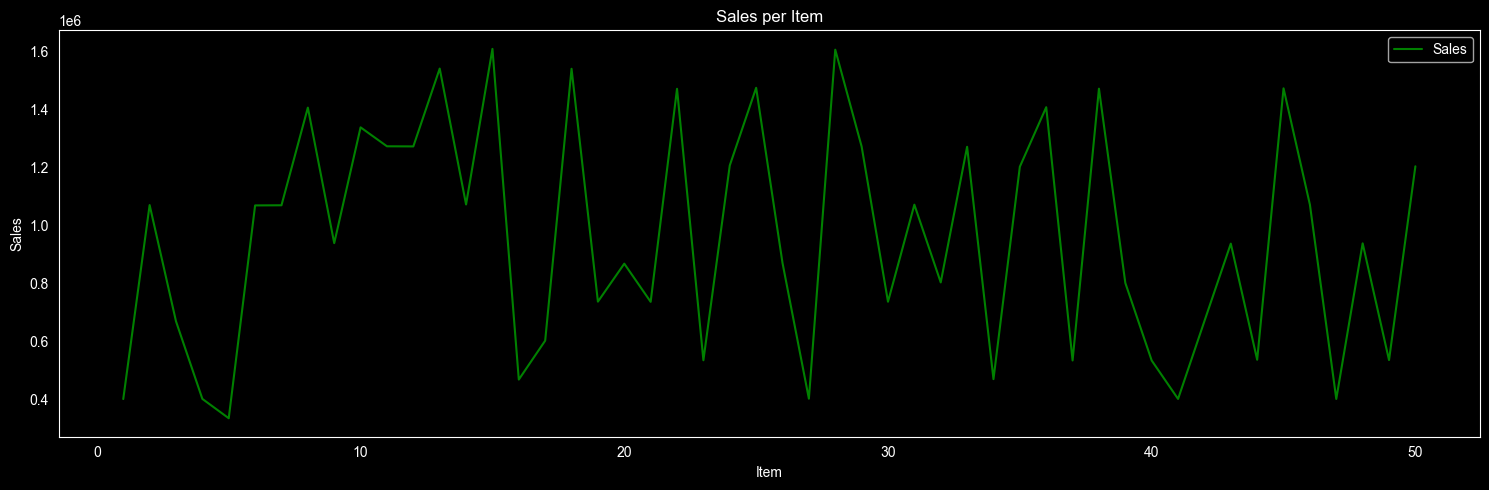

In [9]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(15,5))
plt.plot(total_sales_per_item['item'], total_sales_per_item['sales'], color='green', label='Sales')
plt.title('Sales per Item')
plt.xlabel('Item')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

## Monthly Sales

In [10]:
data_sales_temp = data_sales
data_sales_temp['date'] = data_sales_temp['date'].dt.to_period("M")
monthly_sales = data_sales_temp.groupby('date')['sales'].sum().reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
data_sales['date'] = data_sales['date'].dt.to_timestamp()

In [11]:
monthly_sales.head(12)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


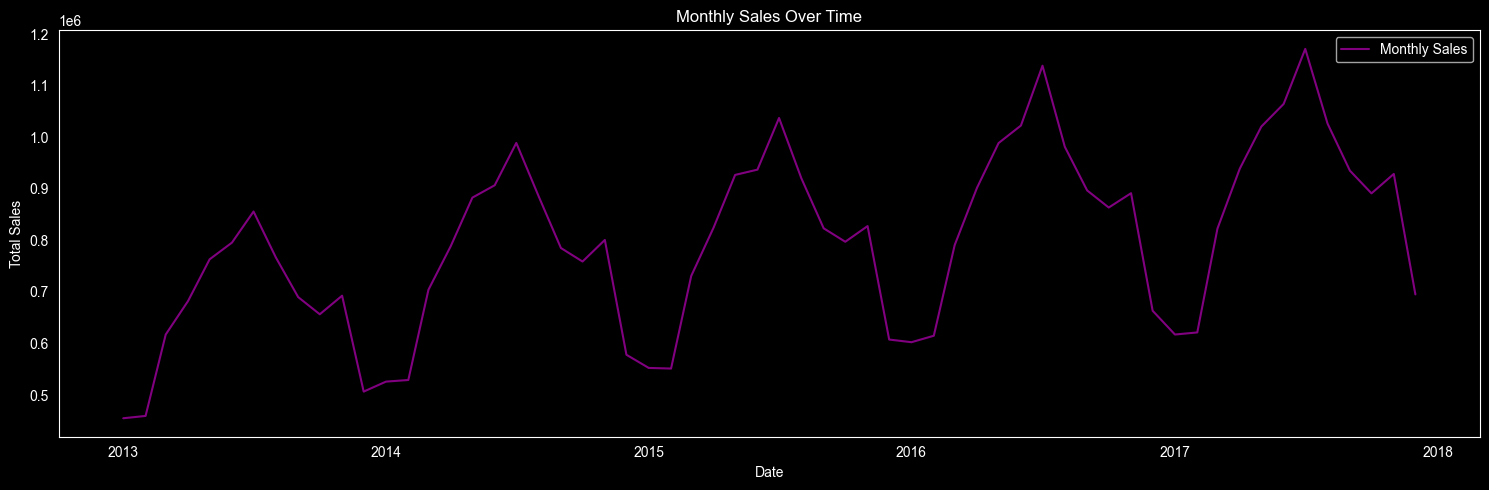

In [12]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'], color='purple', label='Monthly Sales')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()

## Monthly Sales Difference

In [13]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


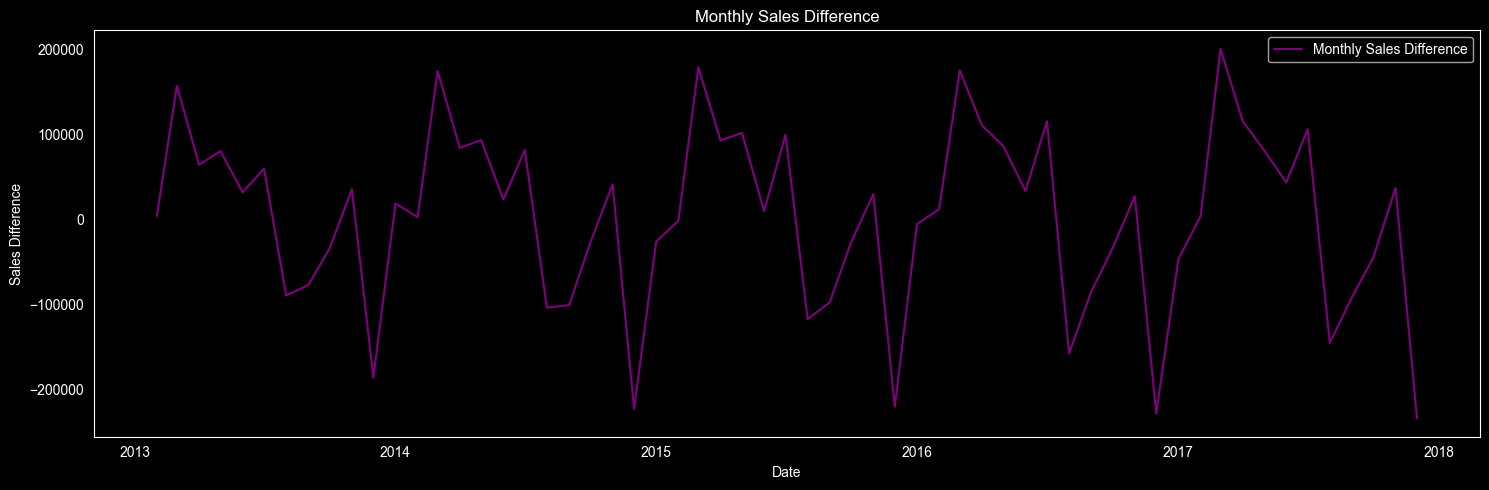

In [14]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales_diff'], color='purple', label='Monthly Sales Difference')
plt.title('Monthly Sales Difference')
plt.xlabel('Date')
plt.ylabel('Sales Difference')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


# Feature Engineering

In [16]:
data_use = monthly_sales.drop(['sales_diff'], axis=1)
data_use.head(10)

,date,sales
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587
10,2013-11-01,692643


In [17]:
data_use.rename(columns={'date': 'ds', 'sales': 'y'}, inplace=True)

# Training the Prophet Model

I use the facebook prophet model here. This model is created to assist with time series forecasting and is a very intriguing model to use especially for datasets like this one.

In [18]:
model = Prophet()

In [19]:
data_train, data_test = train_test_split(data_use, test_size=0.2, shuffle=False)

In [20]:
model.fit(data_train)

22:12:30 - cmdstanpy - INFO - Chain [1] start processing
22:12:30 - cmdstanpy - INFO - Chain [1] done processing


# Prediction

In [21]:
future = data_test['ds']

In [22]:
forecast = model.predict(data_test)

In [23]:
plt.style.use("default")

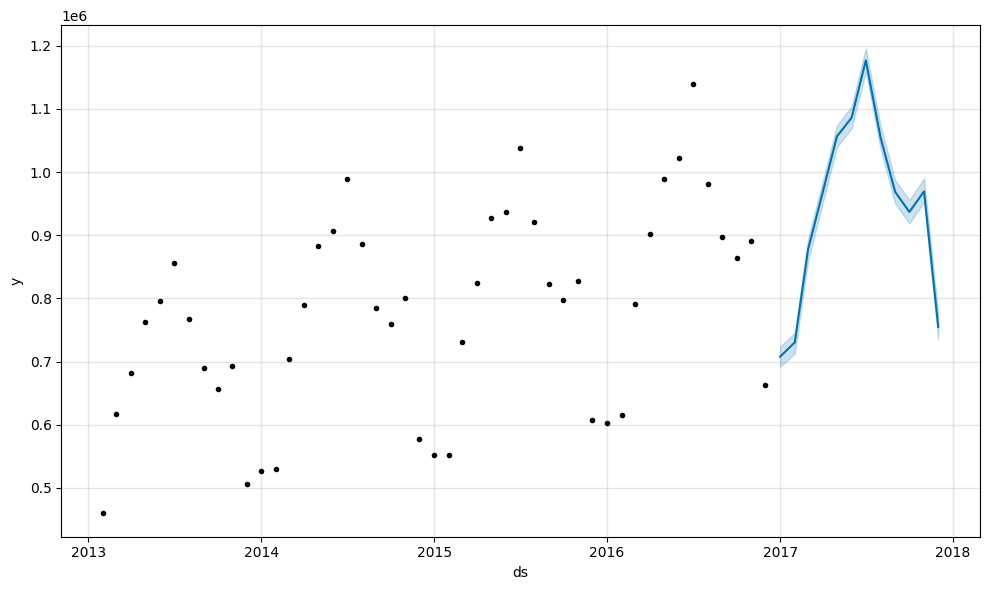

In [24]:
fig = model.plot(forecast)

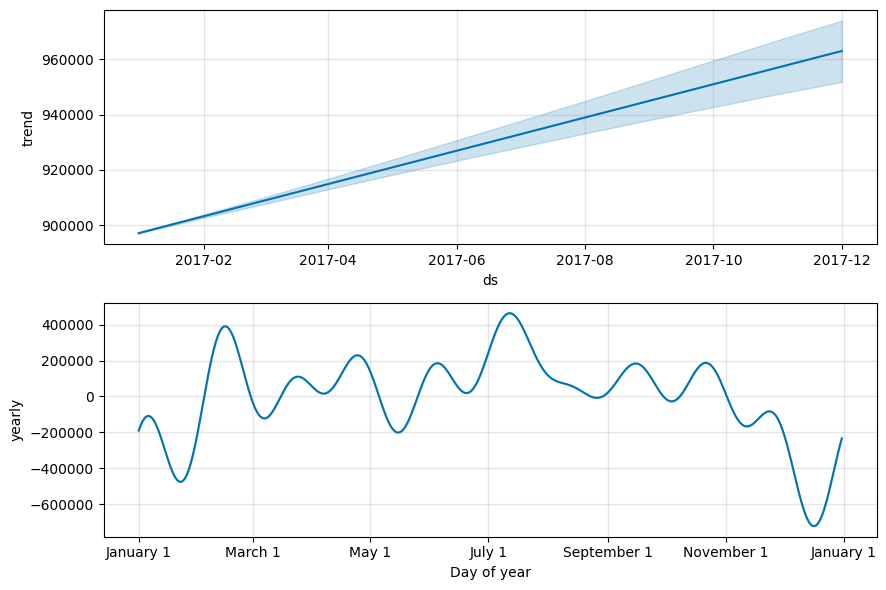

In [25]:
fig2 = model.plot_components(forecast)

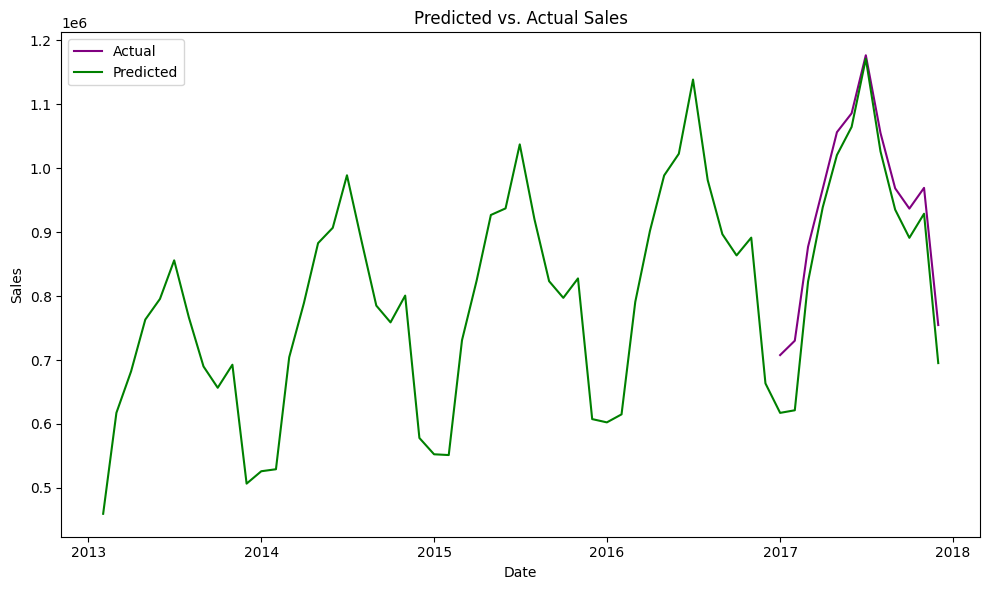

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Actual', color='purple')
plt.plot(data_use['ds'], data_use['y'], label='Predicted', color='green')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted vs. Actual Sales')
plt.legend()
plt.tight_layout()
plt.show()